# Exploring COVID-19 Data
Source: [**The COVID Tracking Project** (API)](https://covidtracking.com/data/api), at The Atlantic

See above link for field descriptions, data sources, and more information.

In [56]:
import requests
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [57]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 31)


In [113]:
# GET json data from API 
response = requests.get("https://api.covidtracking.com/v1/us/daily.json")
data_json = response.content

# pull into Pandas DataFrame
usa_covid_daily_df = pd.read_json(data_json)

# update date format
date_format = '%Y%m%d' # gathered from python datetime documentation
usa_covid_daily_df['date'] = pd.to_datetime(usa_covid_daily_df['date'], format=date_format).dt.date

# set date as index column
usa_covid_daily_df.set_index('date', inplace=True)

# Drop depricated columns
usa_depricated_columns = ['lastModified', 'total', 'dateChecked', 'hospitalized', 'posNeg', 'hash']
usa_covid_daily_df.drop(columns=usa_depricated_columns, inplace=True)

# Delete dates where num states reporting < 50 (latest date with < 50 states = March 6, 2020)
filt = (usa_covid_daily_df['states'] < 50)
usa_covid_daily_df = usa_covid_daily_df.drop(index=usa_covid_daily_df[filt].index)

# Print to Excel
# get latest date in DF
latest_date = str(max(usa_covid_daily_df.index.values))
filname = "csv_extracts/usa_historical/usa_covid_daily_{}.csv".format(latest_date)
usa_covid_daily_df.to_csv('csv_extracts/usa_historical/usa_covid_daily_2020-11-11.csv')

usa_covid_daily_df.head(5)

,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,
2020-11-11,56,10267081,131038041,11287.0,65368.0,504011.0,12518.0,26584.0,3367.0,2947.0,3997175.0,233080.0,160865743,1421,3319,989831,144270,1381858
2020-11-10,56,10122811,130048210,8579.0,61964.0,500692.0,11952.0,26335.0,3205.0,2922.0,3961873.0,231659.0,159483885,1347,3946,938416,130989,1237365
2020-11-09,56,9991822,129109794,23458.0,59275.0,496746.0,11533.0,26087.0,3110.0,2907.0,3928845.0,230312.0,158246520,580,2301,1224702,118708,1518878
2020-11-08,56,9873114,127885092,23353.0,56799.0,494445.0,11120.0,25819.0,2977.0,2900.0,3881558.0,229732.0,156727642,487,1602,924896,110838,1259450
2020-11-07,56,9762276,126960196,23295.0,55840.0,492843.0,11082.0,25721.0,2947.0,2898.0,3851509.0,229245.0,155468192,1104,2374,979681,129191,1405858


In [101]:
# Divide all data by 1,000 (to get better graphs)

positive_thou = list(np.array(usa_covid_daily_df['positive']) / 1000)
positive_thou

[10267.081,
 10122.811,
 9991.822,
 9873.114,
 9762.276,
 9633.085,
 9507.833,
 9391.68,
 9288.613,
 9202.532,
 9120.284,
 9046.233,
 8955.741,
 8859.032,
 8771.039,
 8692.402,
 8619.405,
 8557.302,
 8492.21,
 8409.465,
 8327.203,
 8254.316,
 8193.659,
 8133.347,
 8076.445,
 8027.813,
 7970.065,
 7902.125,
 7839.274,
 7783.038,
 7734.89,
 7692.115,
 7645.414,
 7588.162,
 7531.439,
 7476.321,
 7425.765,
 7387.348,
 7349.491,
 7311.204,
 7260.195,
 7211.062,
 7165.581,
 7121.314,
 7085.025,
 7048.969,
 7013.908,
 6966.328,
 6911.191,
 6867.948,
 6829.401,
 6780.05,
 6740.988,
 6705.3,
 6660.414,
 6613.293,
 6569.918,
 6530.03,
 6495.151,
 6461.467,
 6427.159,
 6385.361,
 6340.673,
 6303.451,
 6272.389,
 6250.225,
 6221.988,
 6188.937,
 6144.204,
 6092.675,
 6048.113,
 6017.826,
 5975.589,
 5944.296,
 5904.886,
 5860.752,
 5814.635,
 5770.871,
 5727.107,
 5690.768,
 5656.436,
 5618.964,
 5573.242,
 5527.014,
 5483.38,
 5438.6,
 5398.161,
 5360.592,
 5318.266,
 5262.406,
 5205.152,
 5153.6

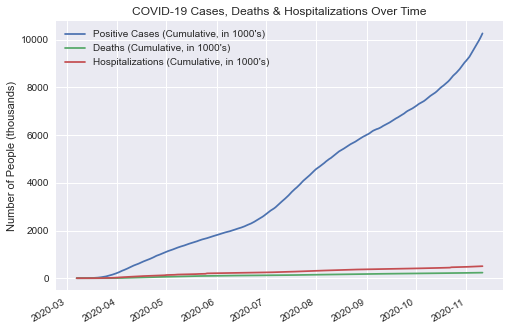

In [115]:
plt.style.use('seaborn')

dates = list(usa_covid_daily_df.index.values)
positive_thousands = np.array(usa_covid_daily_df['positive']) / 1000
deaths_thousands = np.array(usa_covid_daily_df['death']) / 1000
hosp_thousands = np.array(usa_covid_daily_df['hospitalizedCumulative']) / 1000


plt.plot(dates, positive_thousands, label="Positive Cases (Cumulative, in 1000's)")
plt.plot(dates, deaths_thousands, label="Deaths (Cumulative, in 1000's)")
plt.plot(dates, hosp_thousands, label="Hospitalizations (Cumulative, in 1000's)")

plt.legend()
plt.title('COVID-19 Cases, Deaths & Hospitalizations Over Time')
plt.ylabel('Number of People (thousands)')

figure = plt.gcf() # get current figure
figure.autofmt_xdate() # autoformat the figure's dates to be more readable

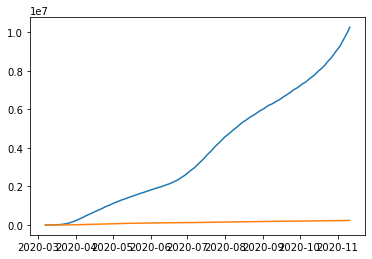

In [92]:
plt.plot(dates, positives, label='Positive Cases (Cumulative)')
plt.plot(dates, deaths, label='Positive Cases (Cumulative)')